<a href="https://colab.research.google.com/github/Sowbarnika-V/Traffic-Sign-Prediction/blob/main/Detection_of_Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
#training model
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
#Moulding Train images

train_datagen=image.ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=image.ImageDataGenerator(rescale=1./255)

In [ ]:
#Reshaping test and validation images

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Traffic_data/Train',
                                                    target_size=(224,224),
                                                    batch_size=10,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Traffic_data/Val',
                                                        target_size=(224,224),
                                                        batch_size=10,
                                                        class_mode='categorical')

Found 500 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [ ]:
##Train the model
history=model.fit_generator(train_generator,
                            steps_per_epoch=7,
                            epochs=20,
                            validation_data=validation_generator,validation_steps=1)

<ipython-input-8-f2789e45e32d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/20
7/7 [==============================] - 29s 3s/step - loss: 1.9659 - accuracy: 0.2429 - val_loss: 1.5022 - val_accuracy: 0.3000
Epoch 2/20
7/7 [==============================] - 20s 3s/step - loss: 1.5846 - accuracy: 0.2571 - val_loss: 1.5870 - val_accuracy: 0.4000
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 1.5318 - accuracy: 0.3286 - val_loss: 1.7199 - val_accuracy: 0.0000e+00
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 1.5119 - accuracy: 0.2857 - val_loss: 1.4444 - val_accuracy: 0.3000
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 1.3263 - accuracy: 0.4714 - val_loss: 1.2118 - val_accuracy: 0.3000
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 1.2058 - accuracy: 0.5000 - val_loss: 0.6488 - val_accuracy: 0.8000
Epoch 7/20
7/7 [==============================] - 11s 2s/step - loss: 1.1449 - accuracy: 0.5286 - val_loss: 1.0599 - val_accuracy: 0.4000
Epoch 8/20
7/7 [===============

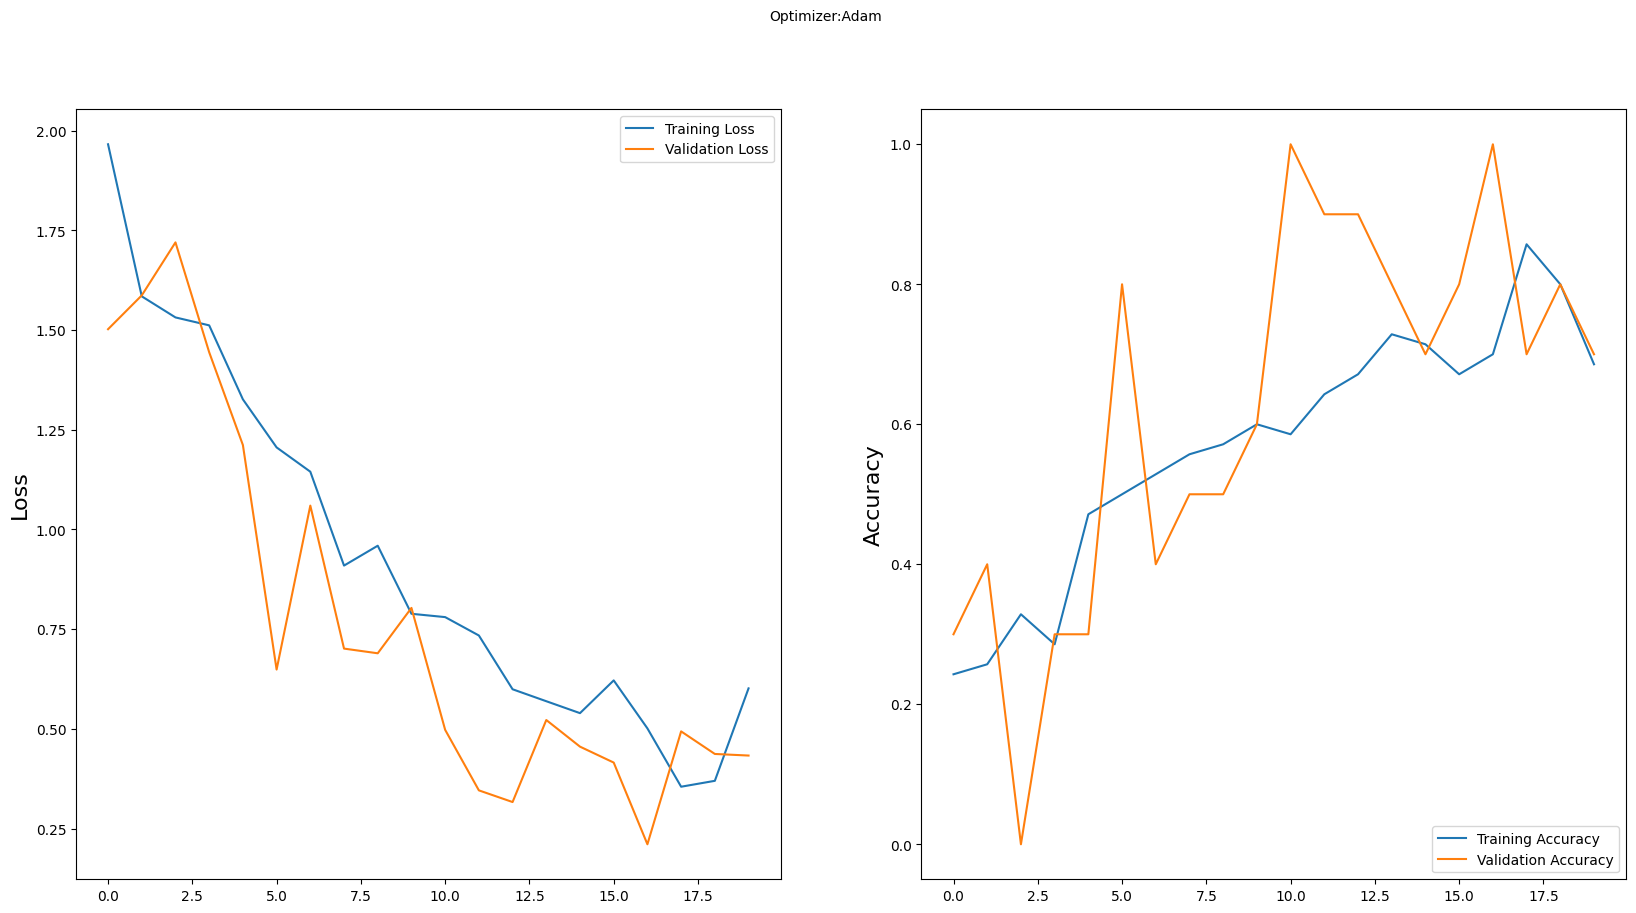

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer:Adam',fontsize=10)
plt.ylabel('Loss',fontsize=16)

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
img=image.load_img('/content/drive/MyDrive/datasets/Traffic_data/Val/40km/003_0023.png',target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
ypred=model.predict(img)
ypred=ypred.argmax()
if(ypred==0):
  print("40 Km")
elif(ypred==1):
    print("60Km")
elif(ypred==2):
  print("left turn")
elif(ypred==3):
  print("right turn")
else:
  print("uturn")

1/1 [==============================] - 0s 46ms/step
40 Km
